In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("haoboxu/amazon-reviews-for-sentiment-analysis")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'amazon-reviews-for-sentiment-analysis' dataset.
Path to dataset files: /kaggle/input/amazon-reviews-for-sentiment-analysis


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import svm

In [ ]:
df = pd.read_csv(path+'/software/software/13_17.csv',index_col=0)
df = df.dropna()

In [ ]:
df

,overall,reviewTime,reviewText
0,1.0,2014,The materials arrived early and were in excell...
1,1.0,2014,I am really enjoying this book with the worksh...
2,-1.0,2014,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ..."
3,0.0,2014,This book was missing pages!!! Important pages...
4,1.0,2013,I have used LearnSmart and can officially say ...
...,...,...,...
459423,-1.0,2016,"I gave this away, it was huge. The fabric patt..."
459428,0.0,2017,So small its hard to make out what it is when ...
459429,-1.0,2017,My fault shorter than i expected..
459430,1.0,2017,I love it .


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df['reviewText'].values

vectorizer = TfidfVectorizer(stop_words='english', min_df=0.00005, ngram_range=(1,1), binary=True)

X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out().shape)
# print(X.toarray())

(12030,)


In [ ]:
y = df['overall'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [ ]:
class_weight = dict(df.groupby('overall')['overall'].count()/df.groupby('overall')['overall'].count().min())

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=45)

X_train, y_train = rus.fit_resample(X_train, y_train)

In [ ]:
rbf_clf = svm.SVC(kernel='rbf', max_iter=10000,C=10000, class_weight = class_weight)

rbf_clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=10000,
    class_weight={-1.0: np.float64(3.418734127759328), 0.0: np.float64(1.0),
                  1.0: np.float64(7.944373901152569)},
    max_iter=10000)

In [ ]:
print(rbf_clf.score(X_train, y_train))
print(rbf_clf.score(X_test, y_test))

0.9788298456470014
0.7459411416156428


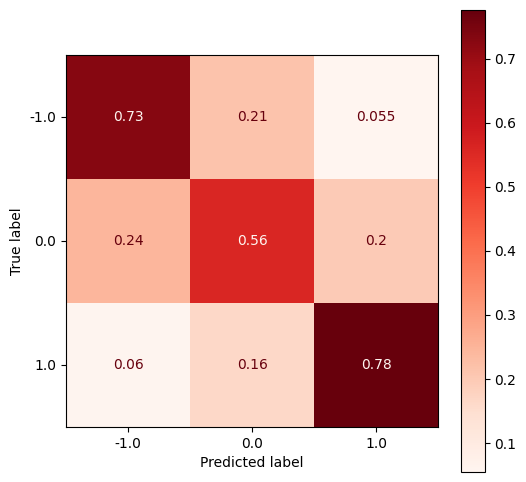

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay.from_estimator(
        rbf_clf,
        X_test,
        y_test,
        cmap="Reds",
        normalize='true',
        ax=ax
    )